In [1]:
import gaps_online as go
import charmingbeauty as cb
import rust_dataclasses as rd
import charmingbeauty.layout as lo
import tqdm
import re
#import HErmes.fitting.model as m
#import dashi as d
#d.visual()

from glob import glob
from pathlib import Path
from copy import deepcopy as copy


In [2]:
tofevents = []
fixed_path = "/data1/nextcloud/cra_data/data/2023_nevis/tof/121/Run121"

#data = "/data1/nextcloud/cra_data/data/2023_nevis/tof/121/Run121_1.2024_03_05-09_47_33.tof.gaps"
files = glob(f'{fixed_path}_*.tof.gaps')
print(len(files))



for fname in files[:20]:
    data = go.tof.get_tofpackets(fname, filter=go.cxx_api.PacketType.TofEvent)
    evts = [go.cxx_api.TofEvent.from_tofpacket(k) for k in data]
    tofevents.extend(evts)

980
[2024-03-15 18:03:20.925] [info] [io.cxx:92] Read out 1920 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 18:03:21] -- Read out 1950 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 18:03:21] -- Read out 1900 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 18:03:21] -- Read out 1965 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 18:03:22] -- Read out 1990 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 18:03:22] -- Read out 1900 packets from bytestream!
[error] [events.cxx - from_bytestream:828] [2024-03-15 18:03:22] -- Size matches neither 20 nor 25 LTBs!
[error] [events.cxx - from_bytestream:214] [2024-03-15 18:03:22] -- Tail signature incorrect! Got tail 50963
[info] [io.cxx - get_tofpackets:92] [2024-03-15 18:03:22] -- Read out 1249 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-15 18:03:22] -- Read out 1939 packets from bytestream

In [ ]:
# tofevents = []
# fixed_path = "/data1/nextcloud/cra_data/data/2023_nevis/tof/121/Run121"

# #data = "/data1/nextcloud/cra_data/data/2023_nevis/tof/121/Run121_1.2024_03_05-09_47_33.tof.gaps"
# files = glob(f'{fixed_path}_*.tof.gaps')
# print(len(files))

# for fname in files:
#     data = go.tof.get_tofpackets(fname, filter=go.cxx_api.PacketType.TofEvent)
#     evts = [go.cxx_api.TofEvent.from_tofpacket(k) for k in data]
#     tofevents.extend(evts)
# print(len(files))


980
[info] [io.cxx - get_tofpackets:92] [2024-03-08 08:48:19] -- Read out 1920 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-08 08:48:19] -- Read out 1950 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-08 08:48:20] -- Read out 1900 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-08 08:48:20] -- Read out 1965 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-08 08:48:20] -- Read out 1990 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-08 08:48:20] -- Read out 1900 packets from bytestream!
[error] [events.cxx - from_bytestream:828] [2024-03-08 08:48:21] -- Size matches neither 20 nor 25 LTBs!
[error] [events.cxx - from_bytestream:214] [2024-03-08 08:48:21] -- Tail signature incorrect! Got tail 50963
[info] [io.cxx - get_tofpackets:92] [2024-03-08 08:48:21] -- Read out 1249 packets from bytestream!
[info] [io.cxx - get_tofpackets:92] [2024-03-08 08:48:21] -- Read out 1939 packets

In [9]:
tofevents = []
file = "/data1/nextcloud/cra_data/data/2023_nevis/tof/121/Run121_100.2024_03_05-10_01_53.tof.gaps"

#data = "/data1/nextcloud/cra_data/data/2023_nevis/tof/121/Run121_1.2024_03_05-09_47_33.tof.gaps"
# Use glob to search for files matching the pattern


data = go.tof.get_tofpackets(file, filter=go.cxx_api.PacketType.TofEvent)
evts = [go.cxx_api.TofEvent.from_tofpacket(k) for k in data]
tofevents.extend(evts)
print(len(tofevents))

[info] [io.cxx - get_tofpackets:92] [2024-03-08 09:02:20] -- Read out 1942 packets from bytestream!
1942


In [6]:
# delta_ts = []
# for ev in tofevents:
    
#     for rb in ev.get_rbids():
#         rb_event = ev.get_rbevent(rb)
#         rbs = ev.get_rbids
#         rb_time = rb_event.header.get_timestamp48()
#         mt_time = ev.mt_event.timestamp
#         delta = rb_time - mt_time
#         delta_ts.append(delta)

        
        

In [15]:
tofevents[0].get_rbids()


[15, 16, 28, 14, 5]

In [64]:

# for garbagevar in range(len(tofevents)):
    
#     event = tofevents[garbagevar]
#     rbs = event.get_rbids()
#     delta_ts = {k : [] for k in rbs}
#     for rb in rbs:
#             rb_event = event.get_rbevent(rb)
#             delta_ts[rb].append(rb_event.header.get_timestamp48() - event.mt_event.timestamp)

In [3]:
delta_ts = {}
for garbagevar in range(len(tofevents)):
    
    event = tofevents[garbagevar]
    rbs = event.get_rbids()
    for rb in rbs:
        if rb not in delta_ts:
            delta_ts[rb] = []  # Initialize the list if rb is encountered for the first time
        rb_event = event.get_rbevent(rb)
        delta_ts[rb].append(rb_event.header.get_timestamp48() - event.mt_event.timestamp)


  plt.figure()  # Create a new figure for each rb



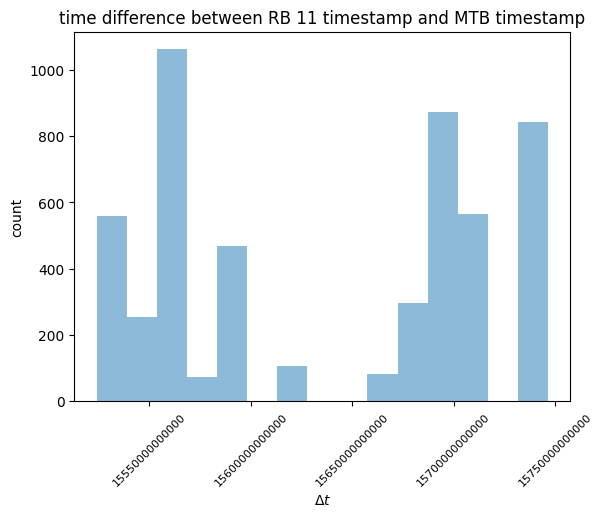

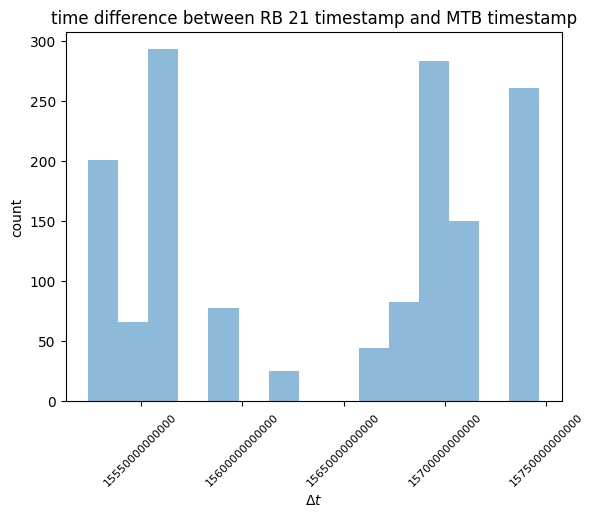

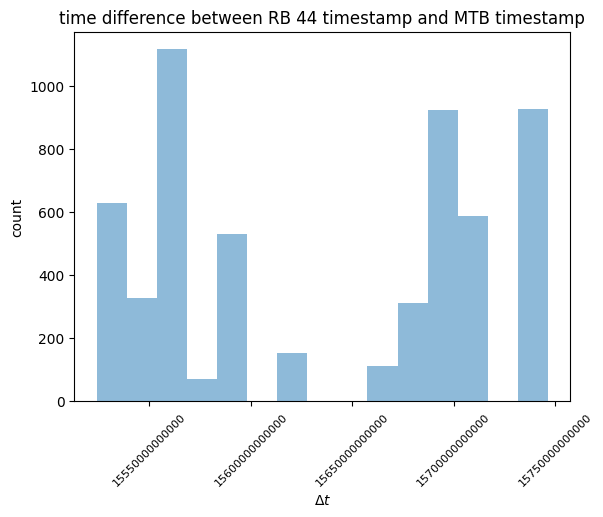

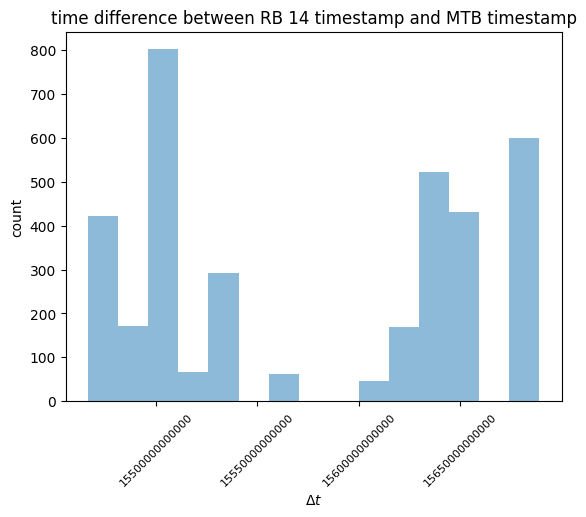

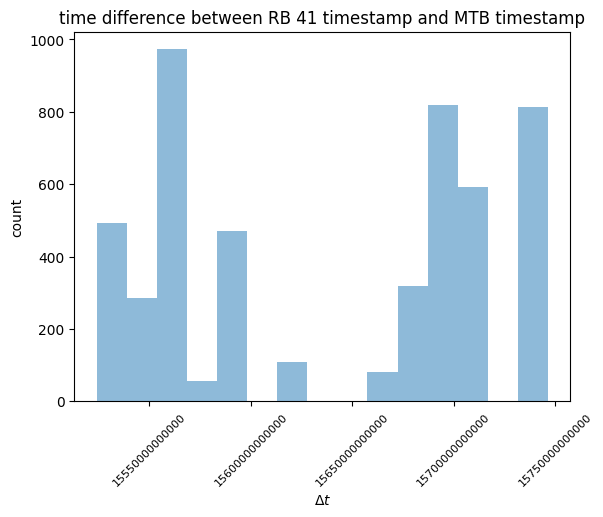

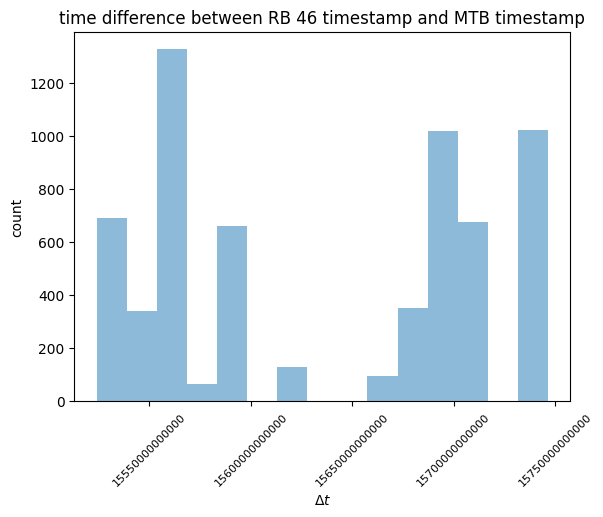

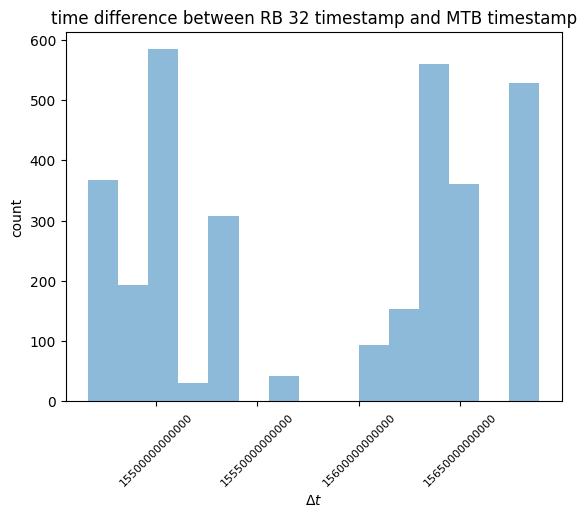

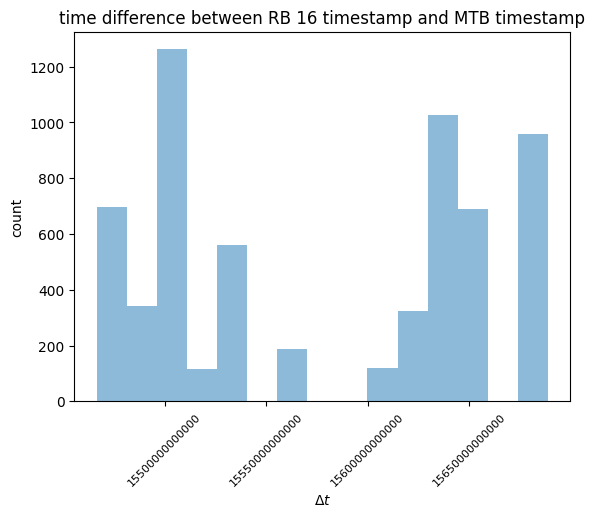

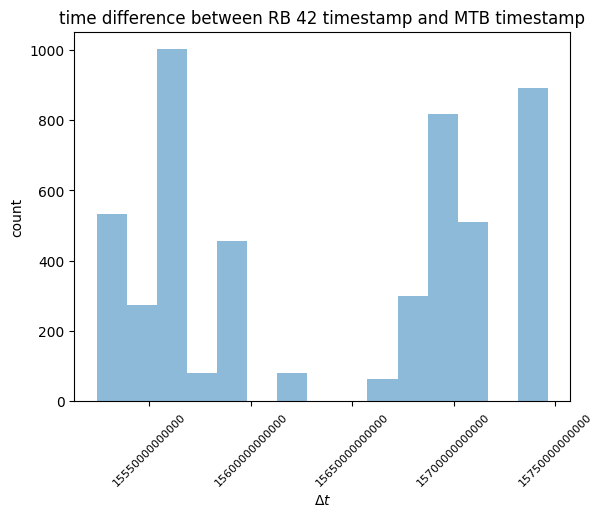

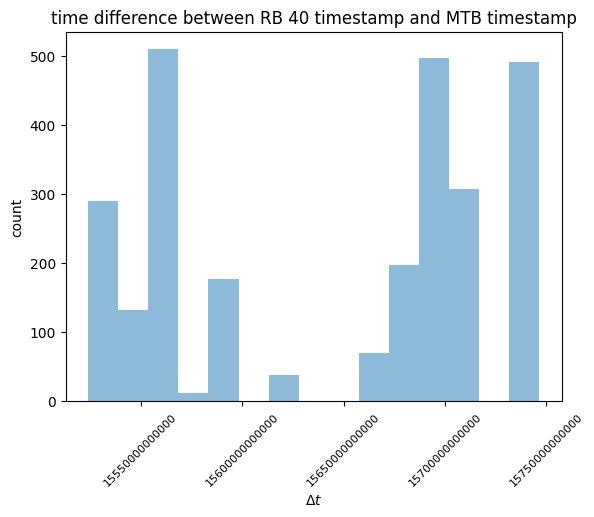

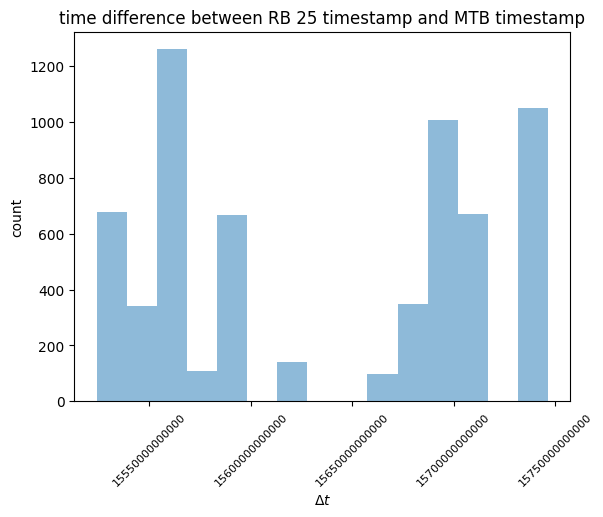

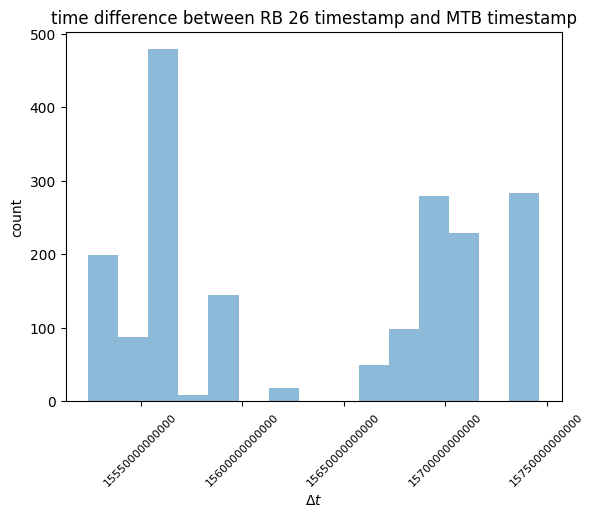

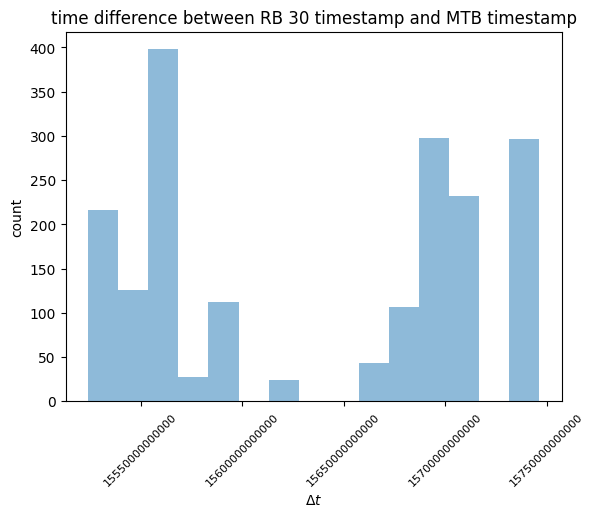

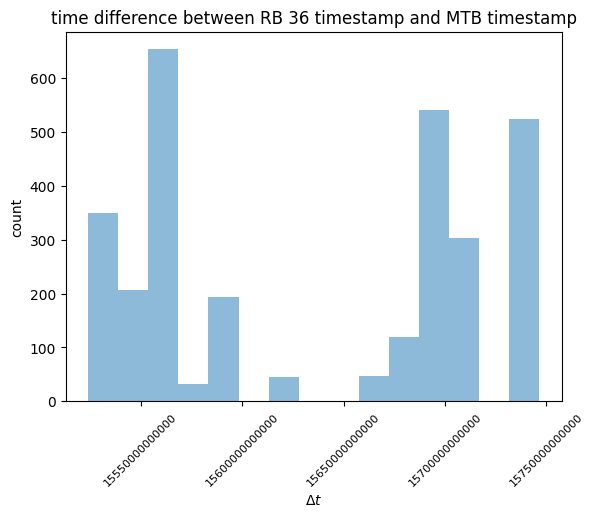

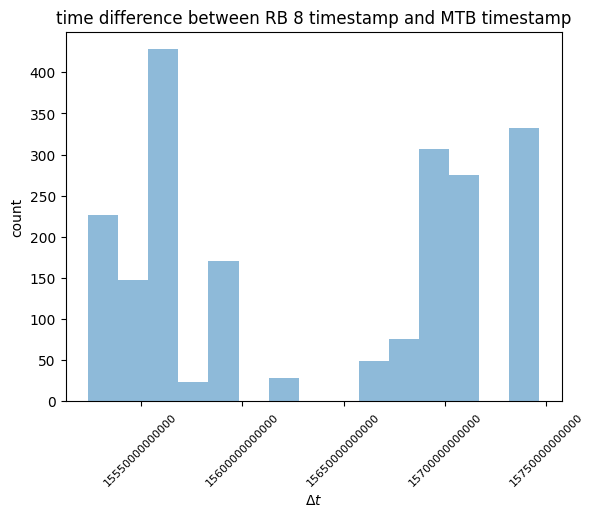

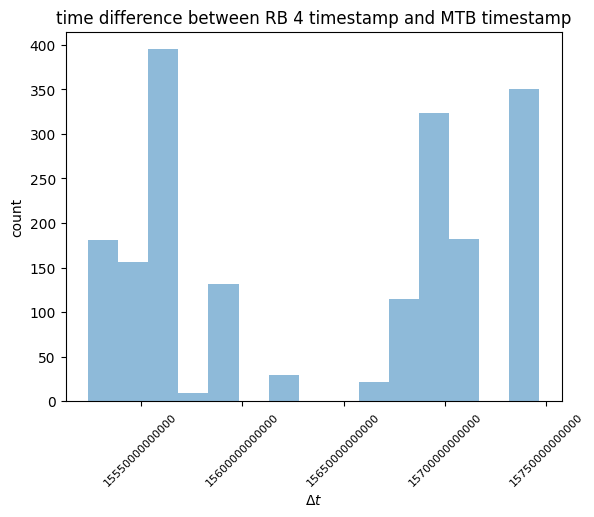

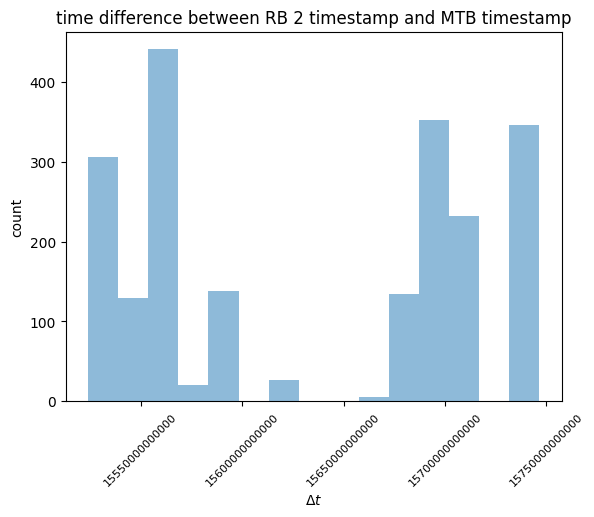

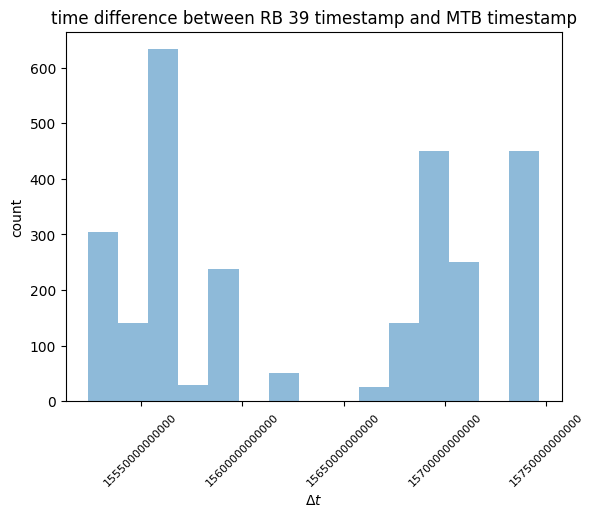

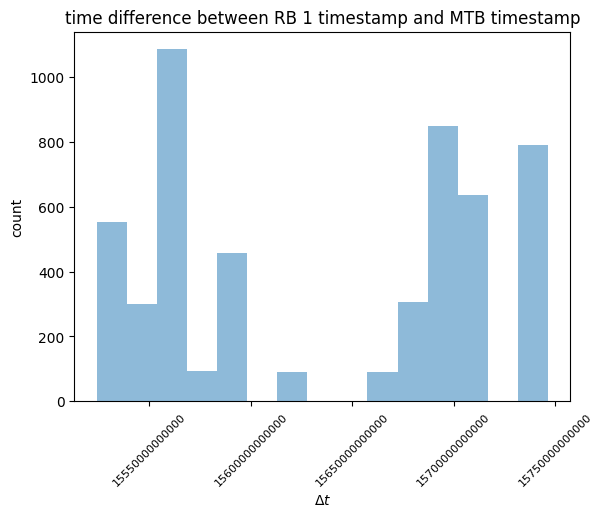

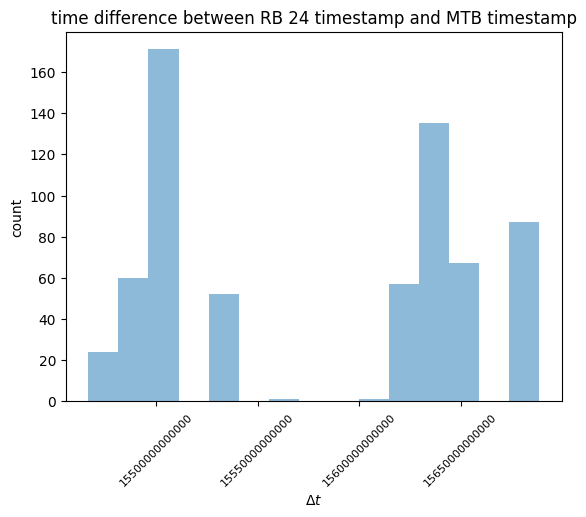

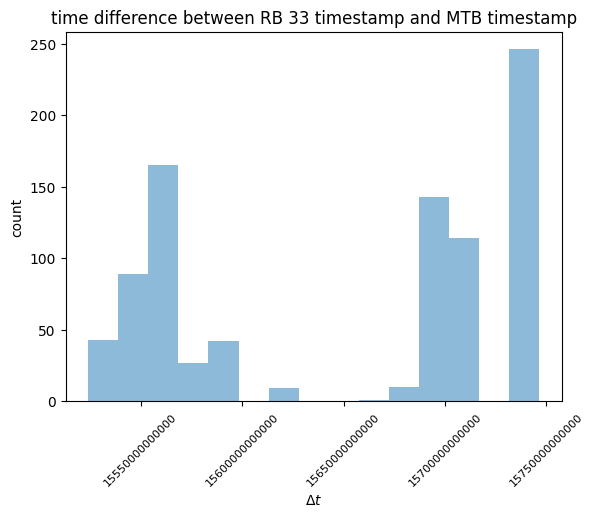

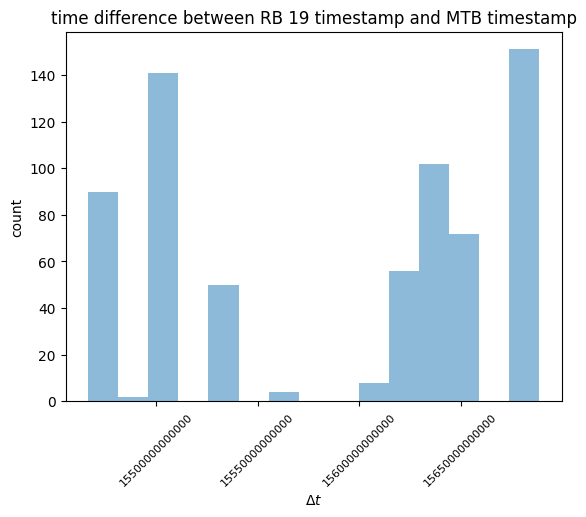

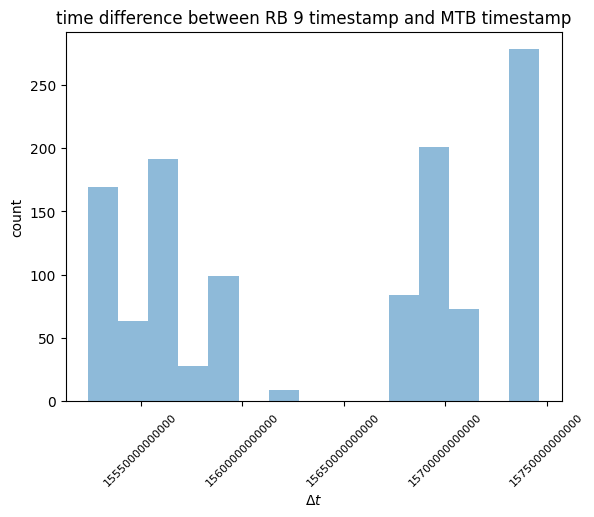

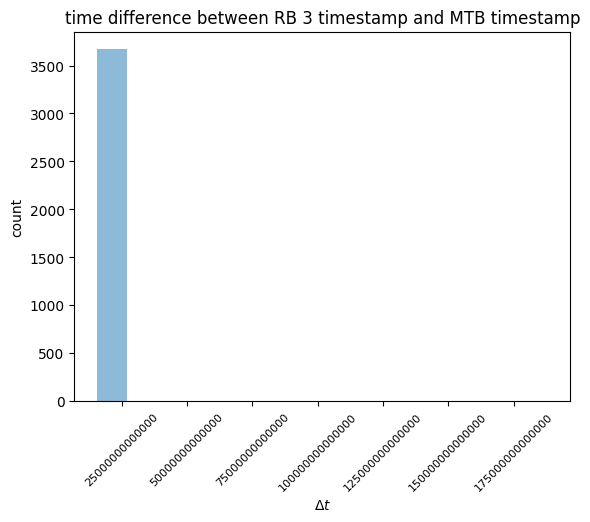

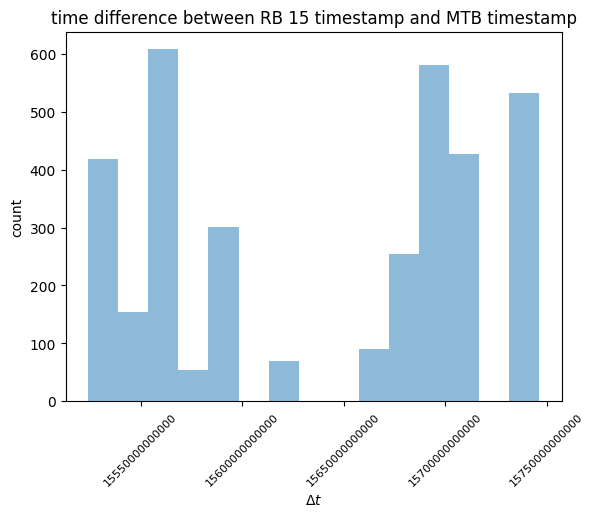

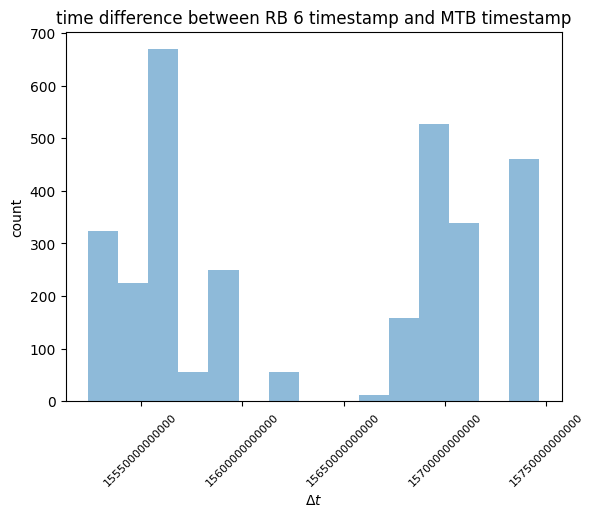

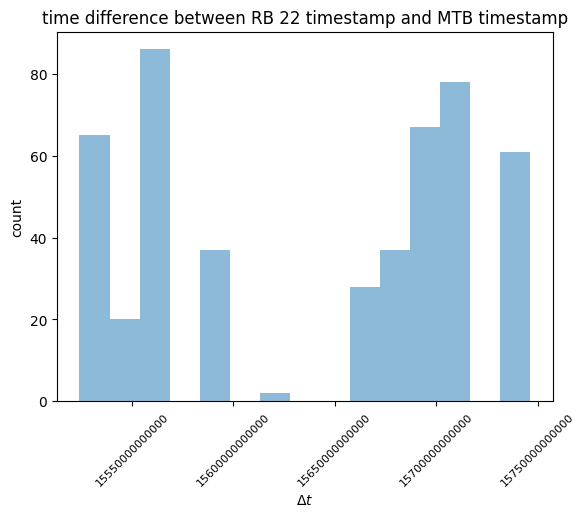

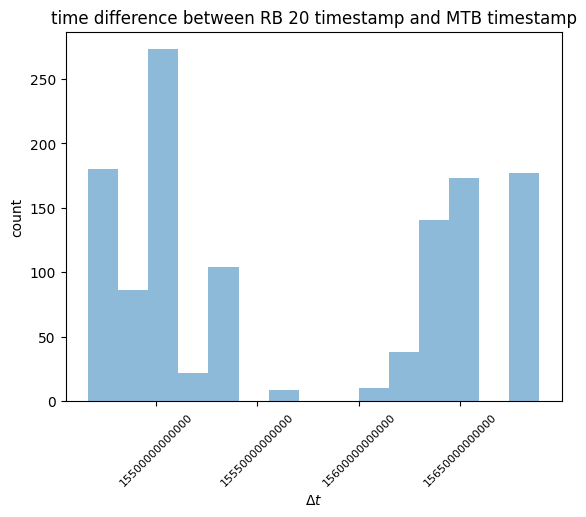

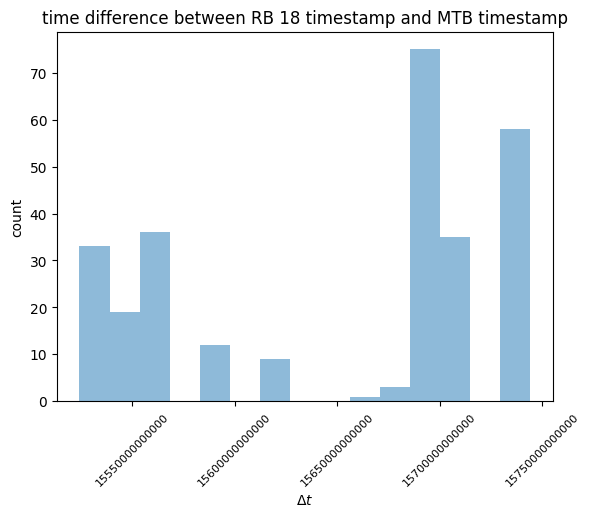

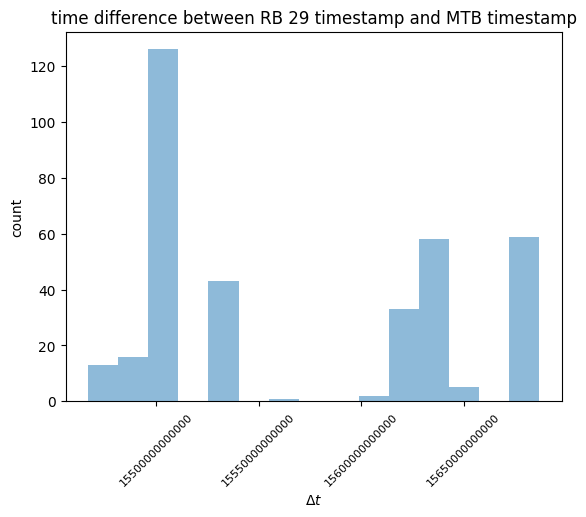

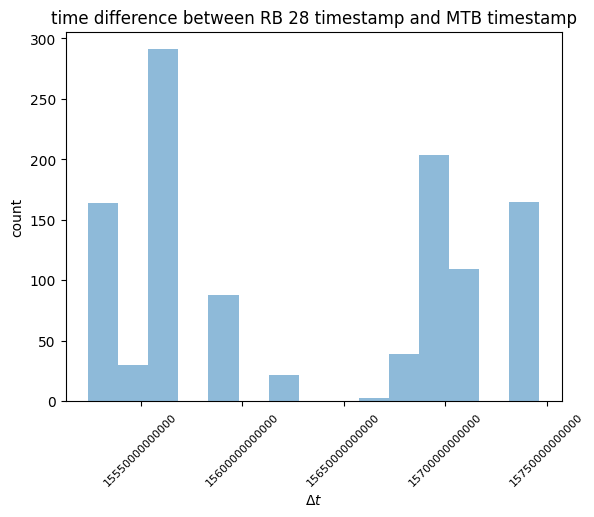

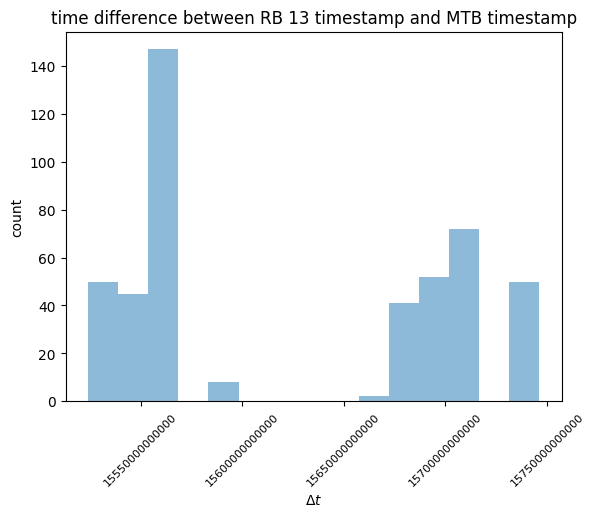

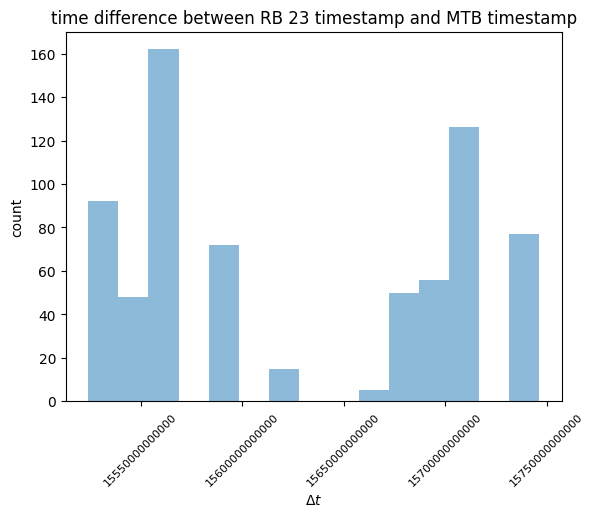

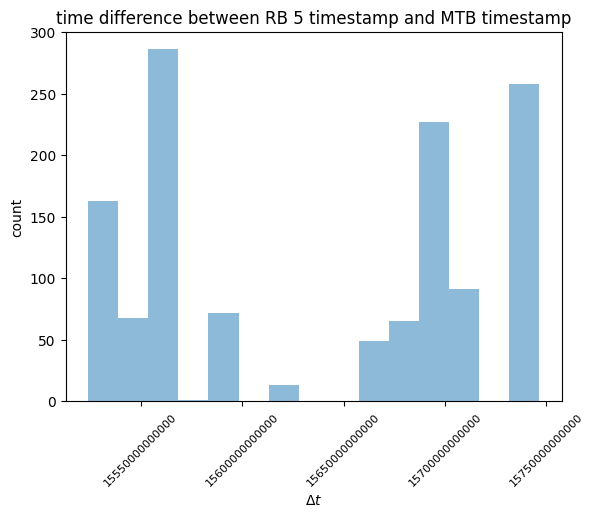

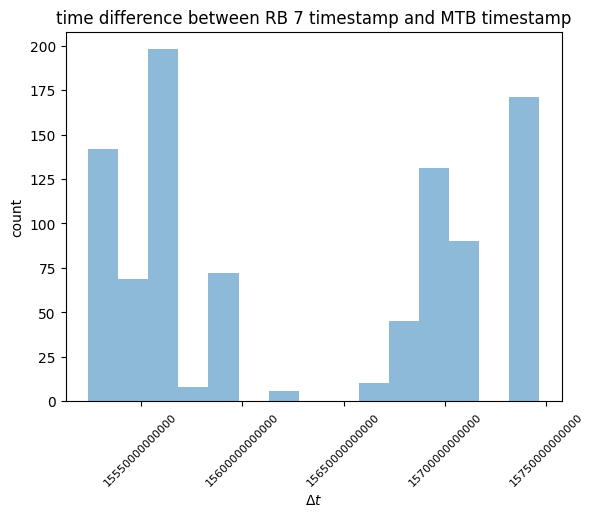

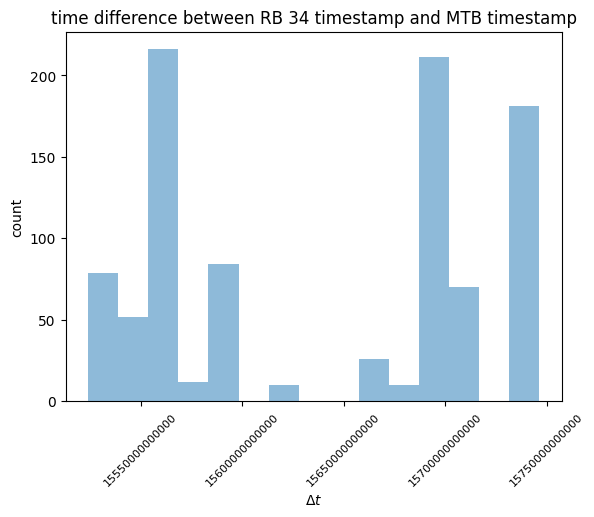

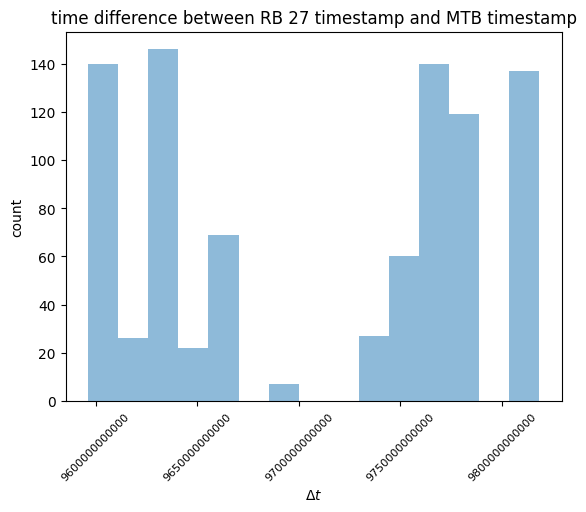

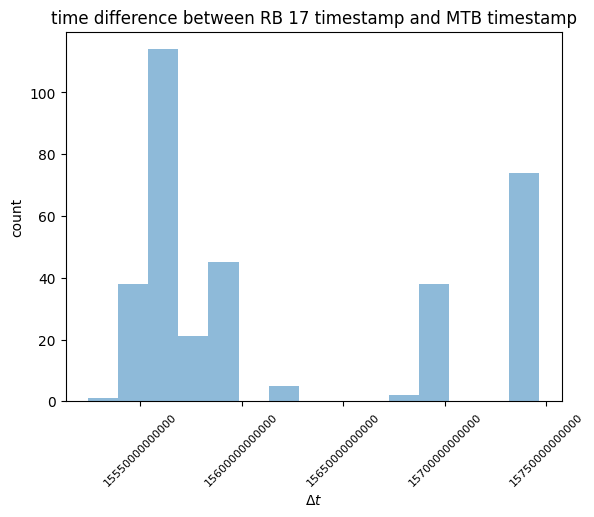

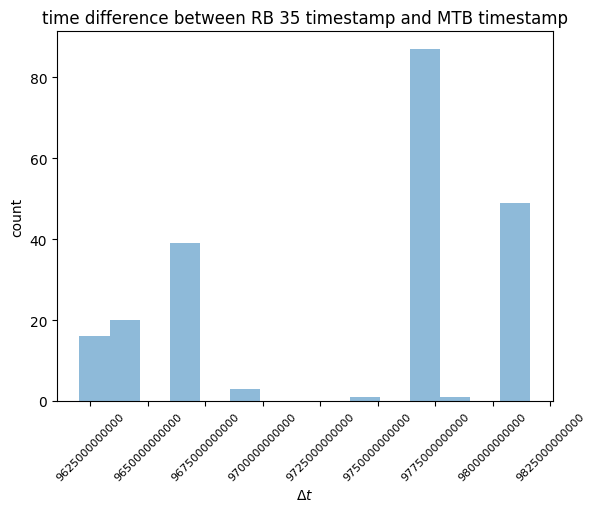

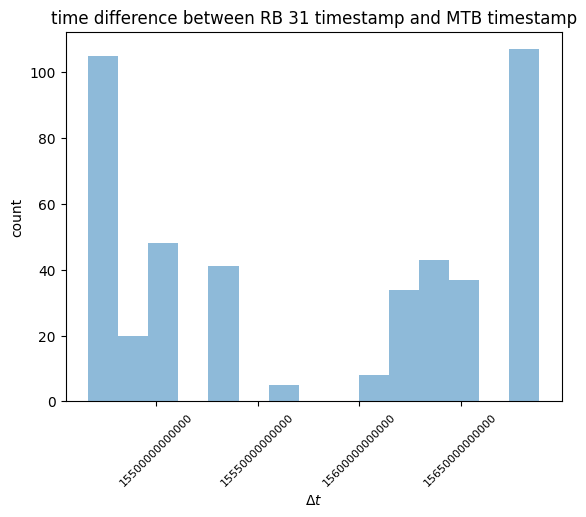

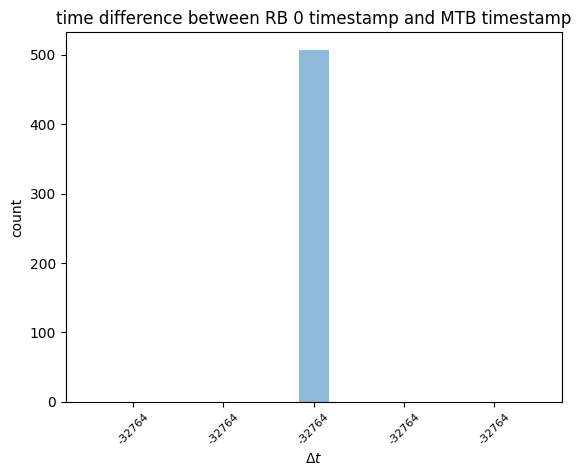

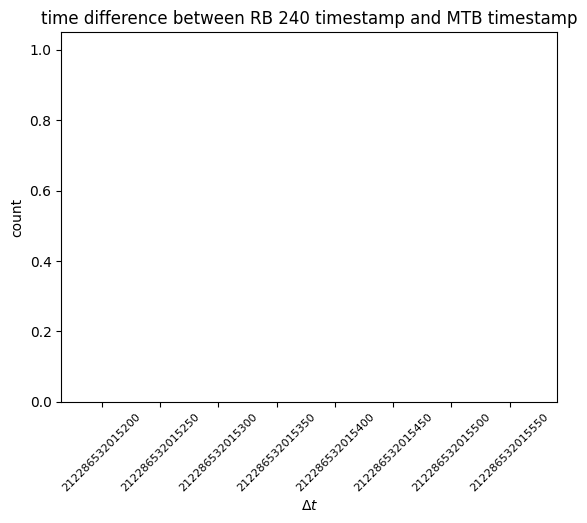

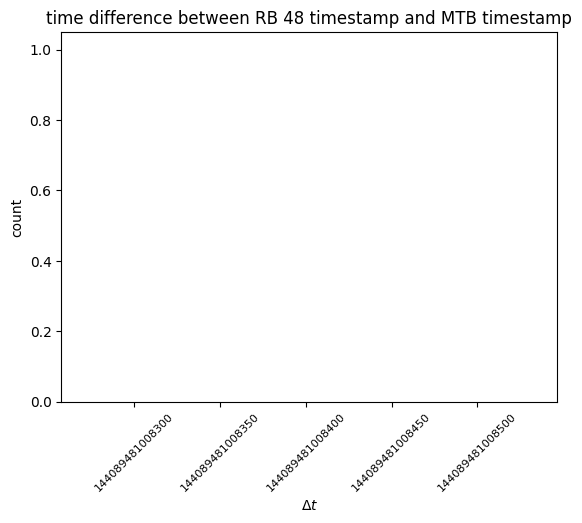

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def format_ticks(x, pos):
    return '{:.0f}'.format(x)


for rb, values in delta_ts.items():
    plt.figure()  # Create a new figure for each rb
    plt.hist(values, bins=15, alpha=0.5)
    # Add labels and title
    plt.xlabel(r'$\Delta t$')
    plt.ylabel('count')
    plt.title(f'time difference between RB {rb} timestamp and MTB timestamp')


    min_val = min(values)
    max_val = max(values)
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_ticks))
    plt.xticks(rotation=45) 
    plt.xticks(fontsize=8)
    

# Show the plot
plt.show()